In [2]:
from IPython.display import HTML

import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import WeekdayLocator
from matplotlib.dates import MonthLocator
from matplotlib.dates import AutoDateLocator
from matplotlib.pyplot import cm
import matplotlib.colors as colors

from data import Data
from report import Report


##################
### RESTART THE KERNEL AFTER ANY CHANGE TO THE IMPORTS' CODE
##################



In [3]:
#----------------------------
source = 'Johns Hopkins'    
region = 'Europe'
state = 'Ireland'

output = Report()

cutoff_positive = 1
cutoff_death = 1
truncate = 0
window = 14

d = Data(source=source, region=region, state=state, county="", cutoff_positive=cutoff_positive, cutoff_death=cutoff_death, truncate=truncate) 

        from         to  fatalities doubling (days)
0 2020-03-14 2020-04-16                           5
1 2020-04-16 2020-06-14                         -12
2 2020-06-14 2020-09-09                        -163
3 2020-09-09 2020-11-09                          36
4 2020-11-09 2020-12-08                       -5462
5 2020-12-08 2020-12-27                         132
6 2020-12-27 2021-01-11                          14
        from         to  positives doubling (days)
0 2020-03-03 2020-04-05                          4
1 2020-04-05 2020-06-26                        -11
2 2020-06-26 2020-10-22                         16
3 2020-10-22 2020-11-10                        -10
4 2020-11-10 2020-11-27                        -44
5 2020-11-27 2020-12-11                        573
6 2020-12-11 2020-12-27                          7
7 2020-12-27 2021-01-11                          4


Report([('PieceWise_Exponential_Growth_model',
         {'name': 'PieceWise_Exponential_Growth_model',
          'datatype': 'MPLPNG',
          'data': <Figure size 864x1728 with 3 Axes>}),
        ('Fatalities_Doubling_Time',
         {'name': 'Fatalities_Doubling_Time',
          'datatype': 'HTML',
          'data': '<p>Fatalities</p><table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>from</th>\n      <th>to</th>\n      <th>fatalities doubling (days)</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2020-03-14</td>\n      <td>2020-04-16</td>\n      <td>5</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020-04-16</td>\n      <td>2020-06-14</td>\n      <td>-12</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2020-06-14</td>\n      <td>2020-09-09</td>\n      <td>-163</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2020-09-09</td>\n      <td>2020-11-09</td>\n      <td>36</td>\n 

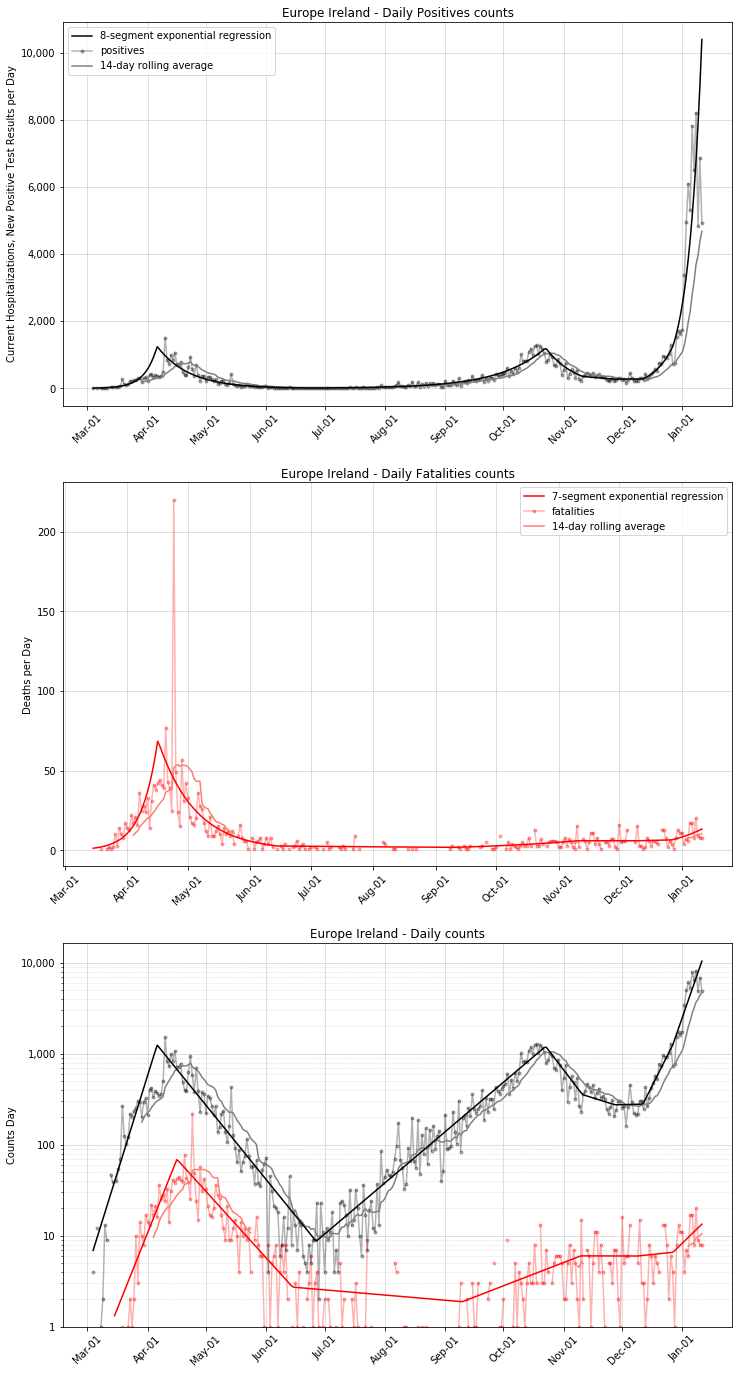

In [4]:
from expgrowth_study import fit_model, loglik_leastsquare, loglik_poisson, loglik_negbin, study3
from piecewise_expgrowth import piecewiseexp_study
from SIR_study import SIR_study

#study3(source, region, state, cutoff_positive,cutoff_death, truncate, window)
piecewiseexp_study(d, output, positives_breaks=7, fatalities_breaks=6, minwindow=14)
#SIR_study(d, output)




In [ ]:


p = d.database.population.report('Europe','Ireland')

print(p['Population'].sum())

HTML(p[['Province_State','Population']].to_html())



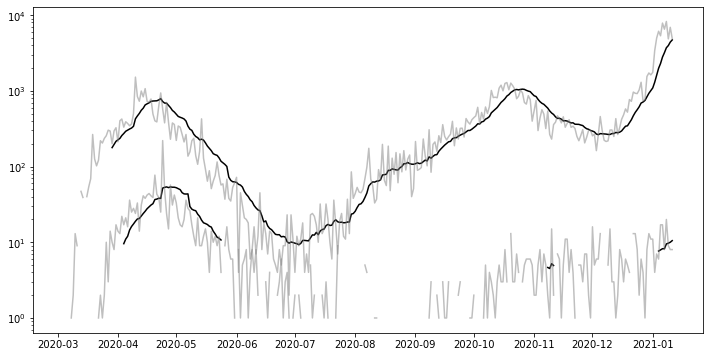

In [6]:
plt.subplots(1,1,figsize=(12,6))

rolling = pd.DataFrame(data = d.dpositives)
rolling_mean = rolling.rolling(14).mean()
plt.plot(d.xd[d.minP+1:], rolling_mean, '-', color='black')
plt.plot(d.xd[d.minP+1:], d.dpositives, '-', color='grey', alpha=0.5)

rolling = pd.DataFrame(data = d.dfatalities)
rolling_mean = rolling.rolling(14).mean()
plt.plot(d.xd[d.minD+1:], rolling_mean, '-', color='black')
plt.plot(d.xd[d.minD+1:], d.dfatalities, '-', color='grey', alpha=0.5)


plt.yscale('log')



In [ ]:
piecewiseexp_study(d, output, positives_breaks=8, fatalities_breaks=7, minwindow=14)

        from         to  fatalities doubling (days)
0 2020-03-14 2020-04-19                           7
1 2020-04-19 2020-06-19                         -12
2 2020-06-19 2020-08-15                         417
3 2020-08-15 2020-08-31                         -18
4 2020-08-31 2020-10-22                          27
5 2020-10-22 2020-11-30                         133
6 2020-11-30 2020-12-27                         231
7 2020-12-27 2021-01-11                          14


In [ ]:
def aux_to_breakpoints(aux, x0, xn, minwindow):
    breakpoints = []
    bi1 = x0
    for a in aux:
        bi = a * (xn-minwindow - (bi1+minwindow)) + bi1+minwindow
        breakpoints.append(bi)
        bi1=bi   
    return breakpoints

def aux_to_breakpoints2(aux, x0, xn, minwindow):
    breakpoints = []
    bi1 = x0
    n=len(aux)
    for i,a in enumerate(aux):
        bi = a * (xn-(n-i)*minwindow - (bi1+minwindow)) + bi1+minwindow
        breakpoints.append(bi)
        bi1=bi   
    return breakpoints

In [ ]:
aux = [0.5, 0, 1]
x0 = 0
xn = 100
minwindow = 5

aux_to_breakpoints2(aux,x0,xn,minwindow)